<h1>Project Flow</h1>

<h3> 1) Understanding The Data </h3>
        <li>Import Libraries</li> 
        <li>Create and understand Dataframe</li>
        <li>Check null values</li>
        <li>Prepare data for clustering (EDA) if required.</li>
     
<h3> 2) Perform Elbow Method to decide optimal number of clusters </h3>
       <li>Using K-Means to iterate from 1-11 clusters and plotting elbow plot.</li>
     
<h3> 3) Training Model using K-Means Algorithm.</h3>
        <li>Initializing model with optimum number of Clusters</li>
        <li>Plot Clusters and Analyse the plot</li>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [72]:
df = pd.read_csv(r"Mall_Customers.csv")

In [73]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.shape #rows and columns

(200, 5)

In [75]:
df.info() #We can see that there are no null values in our project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
 #extracting data is done by using iloc provided by pandas.
#Here we are extracting column 3 and 4 and saving it in another a dataframe in form of arrays
x = df.iloc[:,[3,4]].values 

In [77]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [78]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares (of distance)

In [79]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    # k-means++ is a standard kmeans algo which allows smarter allocation of centroids 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #kmeans inertia is a formula used to segregate data into clusters
                    

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'wcss values')

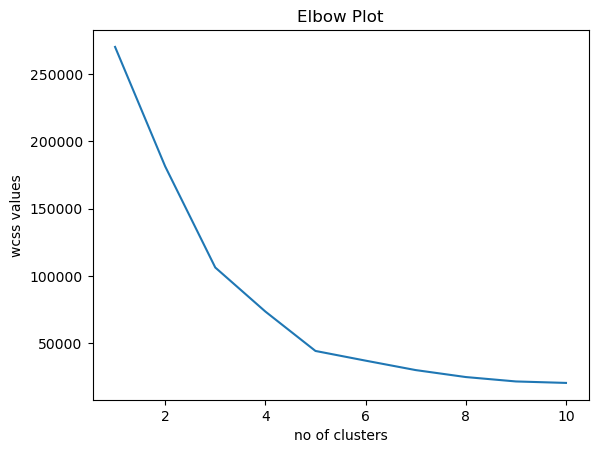

In [80]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Plot")
plt.xlabel('no of clusters')
plt.ylabel('wcss values')

In [81]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeansmodel.fit_predict(x)



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


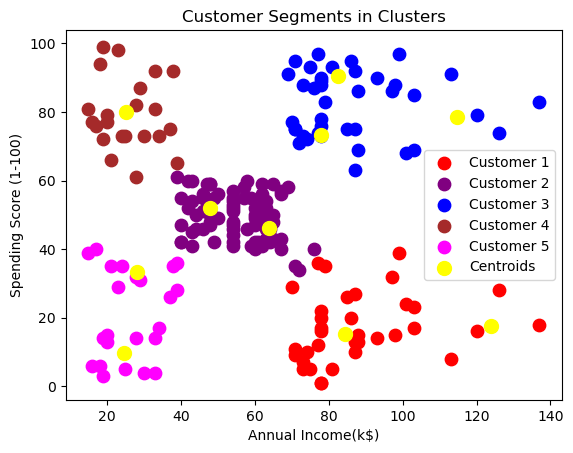

In [82]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 80 , c= "red", label= 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 80 , c= "purple", label= 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 80 , c= "blue", label= 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 80 , c= "brown", label= 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 80 , c= "magenta", label= 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label = 'Centroids')
plt.title('Customer Segments in Clusters')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h3>Analysis</h3>

1) Brown Cluster - Customers with low income but spend a lot
2) Blue Cluster  - Customers with high income and spend a lot
3) Magenta Cluster - Customers with low income and spend less
4) Red Cluster - Customers with low high but spend less
5) Purple Cluster - Customers with decent income but spend moderately

<h3>Conclusion</h3>
Companies would mostly target customers in the purple cluster as it includes maximum data points indicating that maximum customers lie in this range of income and spending tendencies. Pricing, Marketing strategies etc will mostly be dictated by this segment for best profits.

